In [1]:
print("hello world")

hello world


In [5]:
import json

# Path to the verification_results.json file
verification_results_path = "/cs/labs/guykatz/idopinto12/projects/loop_invariant_generation/RLInv/experiments/uautomizer25_eval_self_gen_invs_600.0_500_20251126_124208/verification_results.json"

# Open and load the JSON data
with open(verification_results_path, "r") as f:
    verification_data = json.load(f)

print(verification_data)


{'source_file': '/cs/labs/guykatz/idopinto12/projects/loop_invariant_generation/RLInv/dataset/training/uautomizer25_training_k1_rewrite_/uautomizer25_training_k1_rewrite_filtered.json', 'total_entries': 500, 'uautomizer_version': '25', 'timeout_seconds': 600.0, 'timeout_is_baseline': False, 'results': [{'file': '2686_1.c', 'split': 'easy', 'original_result': 'TRUE', 'baseline_timing': 25.783867379883304, 'invariants': [{'line': 7, 'invariant': '((((((((((((b == 10) && (a == 10)) && (c == 384)) || (((c == 0) && (b == 10)) && (a == 1))) || (((b == 10) && (3 == a)) && (c == 13))) || (((b == 10) && (284 == c)) && (9 == a))) || (((c == 139) && (b == 10)) && (7 == a))) || (((b == 10) && (c == 54)) && (5 == a))) || (((b == 10) && (c == 90)) && (6 == a))) || (((b == 10) && (29 == c)) && (a == 4))) || (((b == 10) && (a == 8)) && (c == 203))) || (((b == 10) && (2 == a)) && (c == 4)))'}], 'usefulness_report': {'decision': 'TIMEOUT', 'time_taken': 600.0, 'reports_dir': '/cs/labs/guykatz/idopinto12

In [7]:
verification_data["metrics"]

{'valid_speedup_count': 80,
 'valid_speedup_list': [1.0885351122650118,
  1.0646241593794672,
  1.9065411186892,
  3.387493267094472,
  1.3233593778649773,
  1.015665100726053,
  1.078313268663405,
  1.2211487312621507,
  2.169358157668316,
  2.4695284914047817,
  4.423824948418634,
  1.2230273191166254,
  1.068912483032026,
  1.071371378171258,
  1.0559606634204766,
  1.0095946877879245,
  1.0313637098077872,
  1.2064085317866664,
  10.512238856818302,
  1.9721422390883303,
  5.069970560960762,
  1.0990053546643592,
  24.00706940873967,
  1.7760162394902703,
  1.9226494432709733,
  1.0123092568839709,
  1.0723847273320262,
  1.1774511363625773,
  2.045671862169032,
  1.3983435901550616,
  1.1122541943118465,
  1.0601587440595321,
  4.0185885412234335,
  1.0254848614940142,
  7.846029761975469,
  2.3252400760913825,
  1.4752759813452654,
  1.0652363007120487,
  1.0086119224804657,
  1.0404810394534596,
  1.4455058815483663,
  1.1295989203441168,
  1.7815555344907654,
  1.04573005299976

{'valid_speedup_count': 80, 'valid_speedup_list': [1.0885351122650118, 1.0646241593794672, 1.9065411186892, 3.387493267094472, 1.3233593778649773, 1.015665100726053, 1.078313268663405, 1.2211487312621507, 2.169358157668316, 2.4695284914047817, 4.423824948418634, 1.2230273191166254, 1.068912483032026, 1.071371378171258, 1.0559606634204766, 1.0095946877879245, 1.0313637098077872, 1.2064085317866664, 10.512238856818302, 1.9721422390883303, 5.069970560960762, 1.0990053546643592, 24.00706940873967, 1.7760162394902703, 1.9226494432709733, 1.0123092568839709, 1.0723847273320262, 1.1774511363625773, 2.045671862169032, 1.3983435901550616, 1.1122541943118465, 1.0601587440595321, 4.0185885412234335, 1.0254848614940142, 7.846029761975469, 2.3252400760913825, 1.4752759813452654, 1.0652363007120487, 1.0086119224804657, 1.0404810394534596, 1.4455058815483663, 1.1295989203441168, 1.7815555344907654, 1.045730052999766, 1.6657326681748532, 1.0656849747032988, 1.0405975407938546, 1.6585900588199778, 1.03

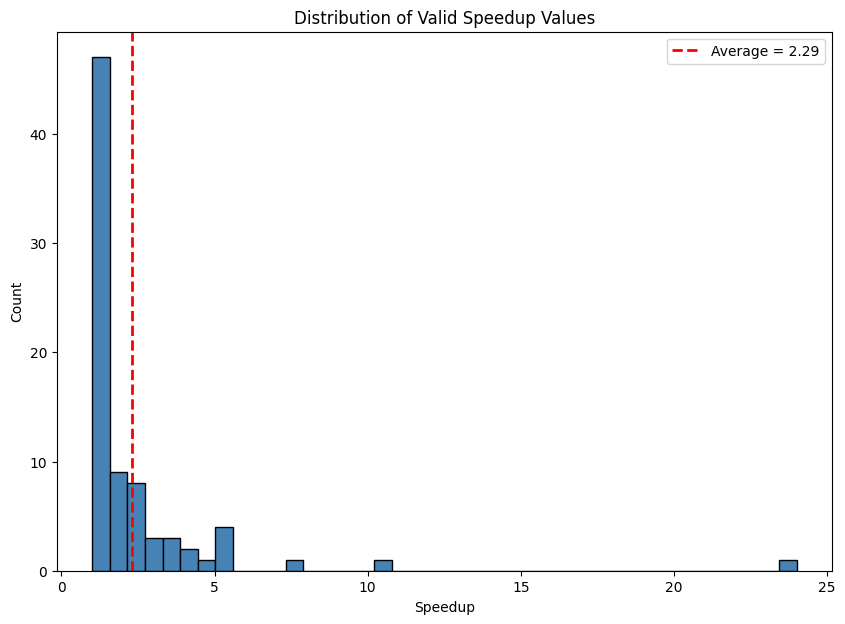

In [9]:
import matplotlib.pyplot as plt

metrics = verification_data["metrics"]
valid_speedup_list = metrics["valid_speedup_list"]
valid_speedup_average = metrics["valid_speedup_average"]
valid_speedup_percentage = metrics["valid_speedup_percentage"]
valid_speedup_count = metrics["valid_speedup_count"]

print({
    "valid_speedup_count": valid_speedup_count,
    "valid_speedup_list": valid_speedup_list,
    "valid_speedup_average": valid_speedup_average,
    "valid_speedup_percentage": valid_speedup_percentage,
})

plt.figure(figsize=(10, 7))
plt.hist(valid_speedup_list, bins=40, color='steelblue', edgecolor='black')
plt.axvline(valid_speedup_average, color='red', linestyle='dashed', linewidth=2, label=f'Average = {valid_speedup_average:.2f}')
plt.xlabel("Speedup")
plt.ylabel("Count")
plt.title("Distribution of Valid Speedup Values")
plt.legend()
plt.show()


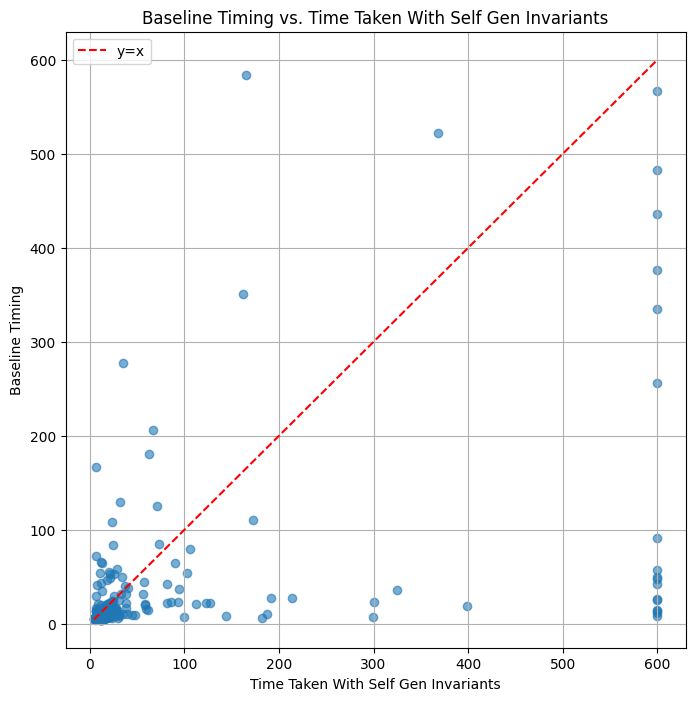

In [12]:
# Scatter plot: x = time_taken, y = baseline_timing

baseline_timings = []
time_taken_list = []

for entry in verification_data["results"]:
    # Some entries may not have useful use in scatter; for those which timed out, use those values as is
    baseline_timing = entry.get("baseline_timing", None)
    usefulness_report = entry.get("usefulness_report", {})
    time_taken = usefulness_report.get("time_taken", None)
    # Only record if both are available
    if baseline_timing is not None and time_taken is not None:
        baseline_timings.append(baseline_timing)
        time_taken_list.append(time_taken)

plt.figure(figsize=(8, 8))
plt.scatter(time_taken_list, baseline_timings, alpha=0.6)

# Add y=x reference line
max_val = max(max(time_taken_list), max(baseline_timings))
min_val = min(min(time_taken_list), min(baseline_timings))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y=x')

plt.xlabel("Time Taken With Self Gen Invariants")
plt.ylabel("Baseline Timing")
plt.title("Baseline Timing vs. Time Taken With Self Gen Invariants")
plt.legend()
plt.grid(True)
plt.show()


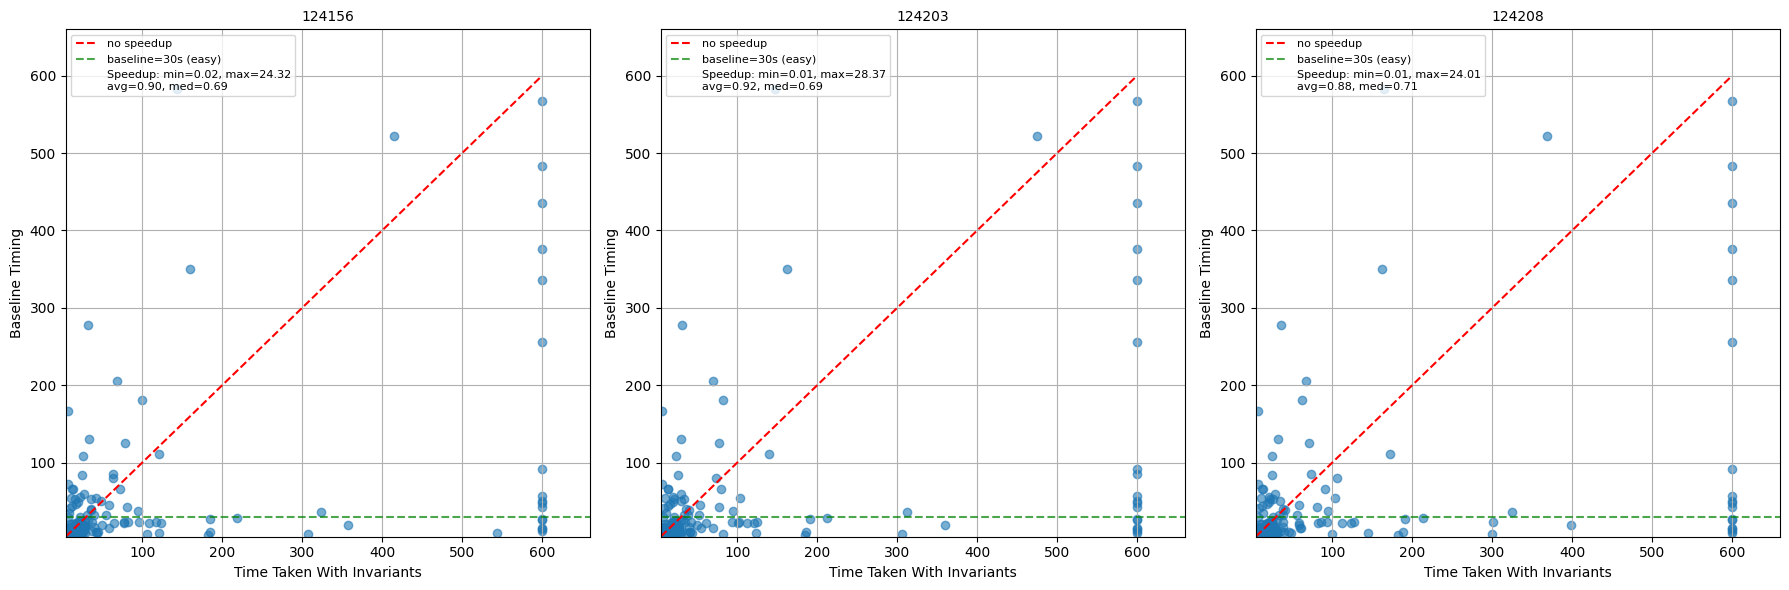

In [16]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

def plot_timing_comparison(experiment_dirs, labels=None):
    """
    Plot scatter plots of baseline timing vs time taken with invariants for multiple experiments.
    
    Args:
        experiment_dirs: List of paths to experiment directories (each should contain verification_results.json)
        labels: Optional list of labels for each experiment. If None, uses directory names.
    """
    n = len(experiment_dirs)
    if labels is None:
        labels = [os.path.basename(d) for d in experiment_dirs]
    
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6), squeeze=False)
    axes = axes[0]  # Since we have 1 row
    
    # Track global min/max for consistent axis limits
    global_min = float('inf')
    global_max = float('-inf')
    
    all_data = []
    
    for i, exp_dir in enumerate(experiment_dirs):
        json_path = os.path.join(exp_dir, "verification_results.json")
        with open(json_path, "r") as f:
            data = json.load(f)
        
        baseline_timings = []
        time_taken_list = []
        speedups = []
        
        for entry in data["results"]:
            baseline_timing = entry.get("baseline_timing", None)
            usefulness_report = entry.get("usefulness_report", {})
            time_taken = usefulness_report.get("time_taken", None)
            if baseline_timing is not None and time_taken is not None:
                baseline_timings.append(baseline_timing)
                time_taken_list.append(time_taken)
                if time_taken > 0:
                    speedups.append(baseline_timing / time_taken)
        
        all_data.append((time_taken_list, baseline_timings, speedups))
        
        if time_taken_list and baseline_timings:
            global_min = min(global_min, min(time_taken_list), min(baseline_timings))
            global_max = max(global_max, max(time_taken_list), max(baseline_timings))
    
    # Plot each experiment
    for i, (exp_dir, label) in enumerate(zip(experiment_dirs, labels)):
        ax = axes[i]
        time_taken_list, baseline_timings, speedups = all_data[i]
        
        # Calculate speedup statistics
        if speedups:
            speedup_min = np.min(speedups)
            speedup_max = np.max(speedups)
            speedup_avg = np.mean(speedups)
            speedup_median = np.median(speedups)
            stats_text = f'min={speedup_min:.2f}, max={speedup_max:.2f}\navg={speedup_avg:.2f}, med={speedup_median:.2f}'
        else:
            stats_text = 'no data'
        
        ax.scatter(time_taken_list, baseline_timings, alpha=0.6)
        
        # Add y=x reference line
        ax.plot([global_min, global_max], [global_min, global_max], 'r--', label='no speedup')
        
        # Add horizontal line at y=30 to mark easy baseline threshold
        ax.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='baseline=30s (easy)')
        
        # Add invisible line for speedup stats in legend
        ax.plot([], [], ' ', label=f'Speedup: {stats_text}')
        
        ax.set_xlabel("Time Taken With Invariants")
        ax.set_ylabel("Baseline Timing")
        ax.set_title(label, fontsize=10)
        ax.legend(loc='upper left', fontsize=8)
        ax.grid(True)
        ax.set_xlim(global_min * 0.9, global_max * 1.1)
        ax.set_ylim(global_min * 0.9, global_max * 1.1)
    
    plt.tight_layout()
    plt.show()


# Test with the specified experiments
experiment_dirs = [
    "/cs/labs/guykatz/idopinto12/projects/loop_invariant_generation/RLInv/experiments/uautomizer25_eval_self_gen_invs_600.0_500_20251126_124156",
    "/cs/labs/guykatz/idopinto12/projects/loop_invariant_generation/RLInv/experiments/uautomizer25_eval_self_gen_invs_600.0_500_20251126_124203",
    "/cs/labs/guykatz/idopinto12/projects/loop_invariant_generation/RLInv/experiments/uautomizer25_eval_self_gen_invs_600.0_500_20251126_124208",
]

# Short labels for clarity
labels = ["124156", "124203", "124208"]

plot_timing_comparison(experiment_dirs, labels)


C File                          Average Speedup   Std Speedup Speedups
1053_1.c                       0.9604 0.0423 [0.9900793982298397, 0.9005955158763138, 0.9905626297478097]
1084_3.c                       0.5283 0.0536 [0.5719546890097112, 0.5601813557883152, 0.45275861285680324]
1124_1.c                       0.6349 0.0214 [0.6572072087499203, 0.6059618298242101, 0.6415266095184596]
1146_1.c                       0.5920 0.0152 [0.5749696055890176, 0.6118796609009006, 0.5891374666557506]
1173_1.c                       0.2747 0.0532 [0.26474987434749264, 0.34435606992088597, 0.2150803612400205]
1179_1.c                       0.4128 0.0322 [0.4478444708121267, 0.4206599240098374, 0.37004547508481167]
1204_1.c                       1.0565 0.0233 [1.039508463465435, 1.0894067636766696, 1.0404810394534596]
1222_1.c                       0.4564 0.0239 [0.48966780463704074, 0.434404460083304, 0.4450500169640403]
1227_2.c                       0.9264 0.0124 [0.9428488749404806, 0.9130065089

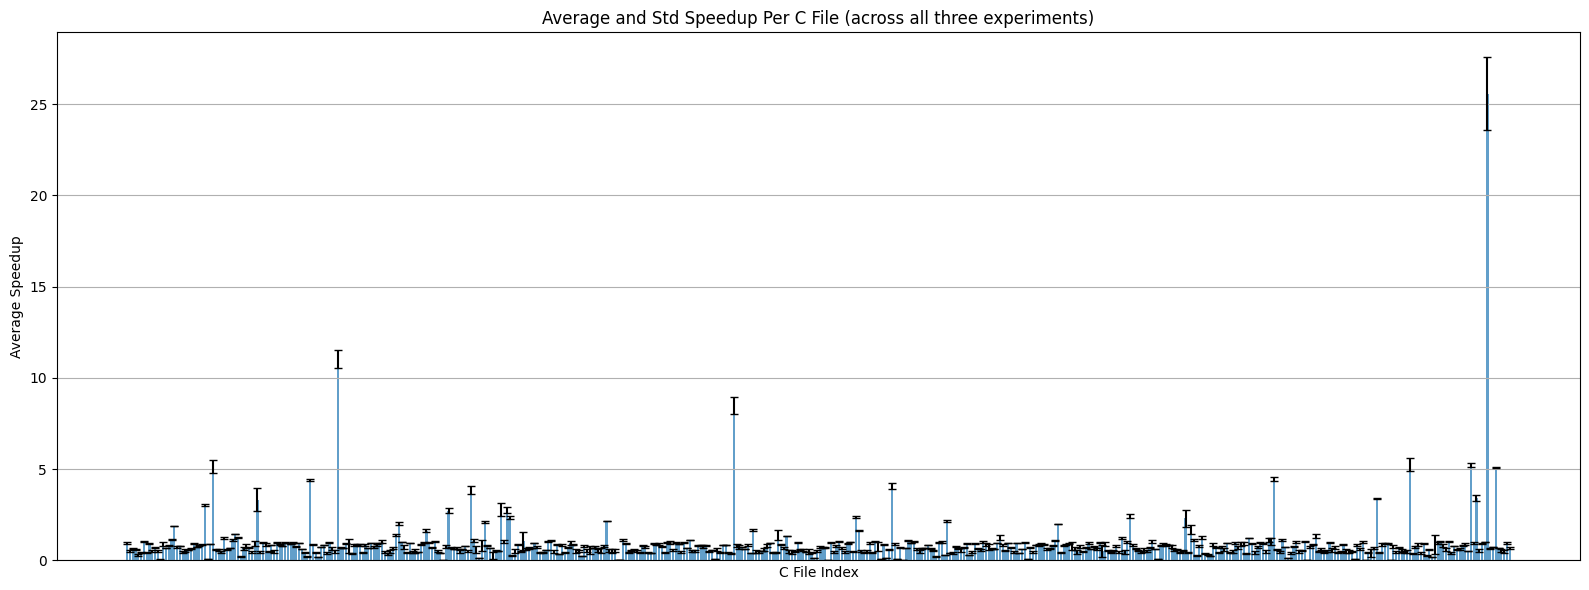

In [ ]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

# Collect all result files for all three experiments
verification_result_files = []
for exp_dir in experiment_dirs:
    verification_result_files.append(os.path.join(exp_dir, "verification_results.json"))

# For each result file, build a mapping from c file name to speedup and correctness
results_per_exp = []
for res_file in verification_result_files:
    with open(res_file, "r") as f:
        data = json.load(f)
        result_map = {} # file.c -> {speedup, has_speedup, decision, original_result}
        for entry in data.get("results", []):
            cfile = entry.get("file")
            speedup = entry.get("speedup", None)
            has_speedup = entry.get("has_speedup", False)
            original_result = entry.get("original_result", None)
            decision = entry.get("usefulness_report", {}).get("decision", None)
            if cfile is not None and speedup is not None:
                result_map[cfile] = {
                    "speedup": speedup,
                    "has_speedup": has_speedup,
                    "original_result": original_result,
                    "decision": decision,
                }
        results_per_exp.append(result_map)

# Gather all unique c file names that appear in any of the experiments
all_cfiles = set()
for d in results_per_exp:
    all_cfiles.update(d.keys())
all_cfiles = sorted(list(all_cfiles))

# For each c file, gather speedups, has_speedup, and correctness from all experiments (may be missing in some)
speedup_stats = []
missing_count = 0
for cfile in all_cfiles:
    speedups = []
    has_speedup_list = []  # True if has_speedup from JSON
    correct_list = []  # True if decision == original_result
    for res_map in results_per_exp:
        if cfile in res_map:
            entry = res_map[cfile]
            speedups.append(entry["speedup"])
            has_speedup_list.append(entry["has_speedup"])
            correct_list.append(entry["decision"] == entry["original_result"])
    if len(speedups) > 0:
        avg = np.mean(speedups)
        std = np.std(speedups)
        speedup_stats.append({"file": cfile, "avg": avg, "std": std, "vals": speedups, "has_speedup": has_speedup_list, "correct": correct_list})
    else:
        missing_count += 1

# Print the average and std speedup for every c file
print(f"{'C File':30s} {'Average Speedup':>16s} {'Std Speedup':>13s} {'Speedups'}")
for s in speedup_stats:
    print(f"{s['file']:30s} {s['avg']:.4f} {s['std']:.4f} {s['vals']}")

# Also make a plot of per-file average and std speedup
avg_list = [s["avg"] for s in speedup_stats]
std_list = [s["std"] for s in speedup_stats]
cfile_names = [s["file"] for s in speedup_stats]

fig, ax = plt.subplots(figsize=(16, 6))
x = np.arange(len(cfile_names))
ax.bar(x, avg_list, yerr=std_list, capsize=3, alpha=0.7)
ax.set_xlabel("C File Index")
ax.set_ylabel("Average Speedup")
ax.set_title("Average and Std Speedup Per C File (across all three experiments)")
# Optionally add file names for a subset of points for orientation
if len(x) < 50:
    ax.set_xticks(x)
    ax.set_xticklabels(cfile_names, rotation=90, fontsize=7)
else:
    ax.set_xticks([])
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()



Only for files with all valid speedups (has_speedup=True):
C File                          Average Speedup   Std Speedup Speedups
1204_1.c                       1.0565 0.0233 [1.039508463465435, 1.0894067636766696, 1.0404810394534596]
1329_1.c                       1.1454 0.0446 [1.1315090811094648, 1.2056937164045605, 1.0990053546643592]
132_3.c                        1.9043 0.0047 [1.8977316332109173, 1.9085083473398354, 1.9065411186892]
1512_2.c                       3.0286 0.0588 [3.0373317876001655, 2.9526762274323817, 3.0959029395559488]
151_1.c                        5.1566 0.3503 [4.662171226382236, 5.430237499156579, 5.377329886706108]
157_2.c                        1.2225 0.0370 [1.1779013382195278, 1.2685436026182983, 1.2211487312621507]
1610_3.c                       1.1226 0.0448 [1.0740510112947648, 1.1821067560572671, 1.111707095701201]
1614_2.c                       1.4444 0.0130 [1.4278259714590875, 1.4597275456687973, 1.4455058815483663]
1614_3.c                     

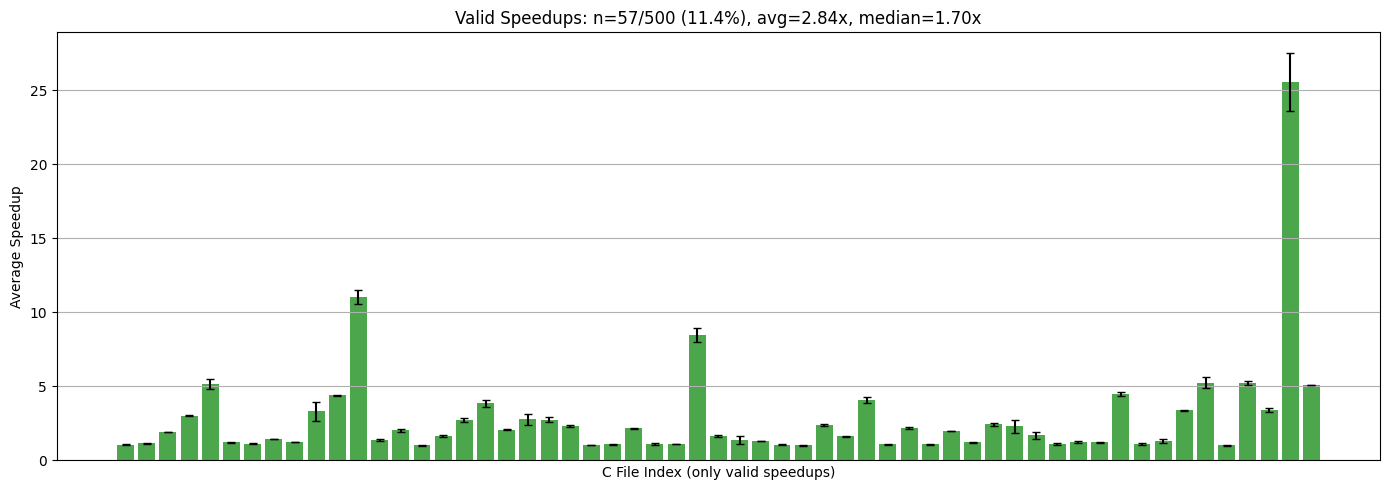

In [30]:
# Only for valid speedups: has_speedup == True (already includes correct decision check)
valid_speedup_stats = [
    s for s in speedup_stats 
    if all(s["has_speedup"])
]

print("\nOnly for files with all valid speedups (has_speedup=True):")
print(f"{'C File':30s} {'Average Speedup':>16s} {'Std Speedup':>13s} {'Speedups'}")
for s in valid_speedup_stats:
    print(f"{s['file']:30s} {s['avg']:.4f} {s['std']:.4f} {s['vals']}")

# Plot for only valid speedup files
if valid_speedup_stats:
    avg_valid = [s["avg"] for s in valid_speedup_stats]
    std_valid = [s["std"] for s in valid_speedup_stats]
    cfile_valid = [s["file"] for s in valid_speedup_stats]
    
    # Calculate summary stats for title
    num_valid = len(valid_speedup_stats)
    total_entries = len(speedup_stats)
    success_rate = (num_valid / total_entries) * 100 if total_entries > 0 else 0
    avg_of_avg = np.mean(avg_valid)
    median_of_avg = np.median(avg_valid)

    fig, ax = plt.subplots(figsize=(14, 5))
    x = np.arange(len(cfile_valid))
    ax.bar(x, avg_valid, yerr=std_valid, capsize=3, alpha=0.7, color='green')
    ax.set_xlabel("C File Index (only valid speedups)")
    ax.set_ylabel("Average Speedup")
    ax.set_title(f"Valid Speedups: n={num_valid}/{total_entries} ({success_rate:.1f}%), avg={avg_of_avg:.2f}x, median={median_of_avg:.2f}x")
    if len(x) < 50:
        ax.set_xticks(x)
        ax.set_xticklabels(cfile_valid, rotation=90, fontsize=7)
    else:
        ax.set_xticks([])
    ax.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No files with all has_speedup=True found.")


In [ ]:
# Analyze which files are in the intersection vs not
from collections import defaultdict

intersection_files = set(s["file"] for s in valid_speedup_stats)
all_files = set(s["file"] for s in speedup_stats)
not_in_intersection = all_files - intersection_files

print(f"=== FILES IN INTERSECTION (has_speedup=True in ALL experiments): {len(intersection_files)} files ===")
for f in sorted(intersection_files):
    s = next(x for x in speedup_stats if x["file"] == f)
    print(f"  {f}: speedups={s['vals']}, has_speedup={s['has_speedup']}")


=== FILES IN INTERSECTION (has_speedup=True in ALL experiments): 57 files ===
  1204_1.c: speedups=[1.039508463465435, 1.0894067636766696, 1.0404810394534596], has_speedup=[True, True, True]
  1329_1.c: speedups=[1.1315090811094648, 1.2056937164045605, 1.0990053546643592], has_speedup=[True, True, True]
  132_3.c: speedups=[1.8977316332109173, 1.9085083473398354, 1.9065411186892], has_speedup=[True, True, True]
  1512_2.c: speedups=[3.0373317876001655, 2.9526762274323817, 3.0959029395559488], has_speedup=[True, True, True]
  151_1.c: speedups=[4.662171226382236, 5.430237499156579, 5.377329886706108], has_speedup=[True, True, True]
  157_2.c: speedups=[1.1779013382195278, 1.2685436026182983, 1.2211487312621507], has_speedup=[True, True, True]
  1610_3.c: speedups=[1.0740510112947648, 1.1821067560572671, 1.111707095701201], has_speedup=[True, True, True]
  1614_2.c: speedups=[1.4278259714590875, 1.4597275456687973, 1.4455058815483663], has_speedup=[True, True, True]
  1614_3.c: speedups=

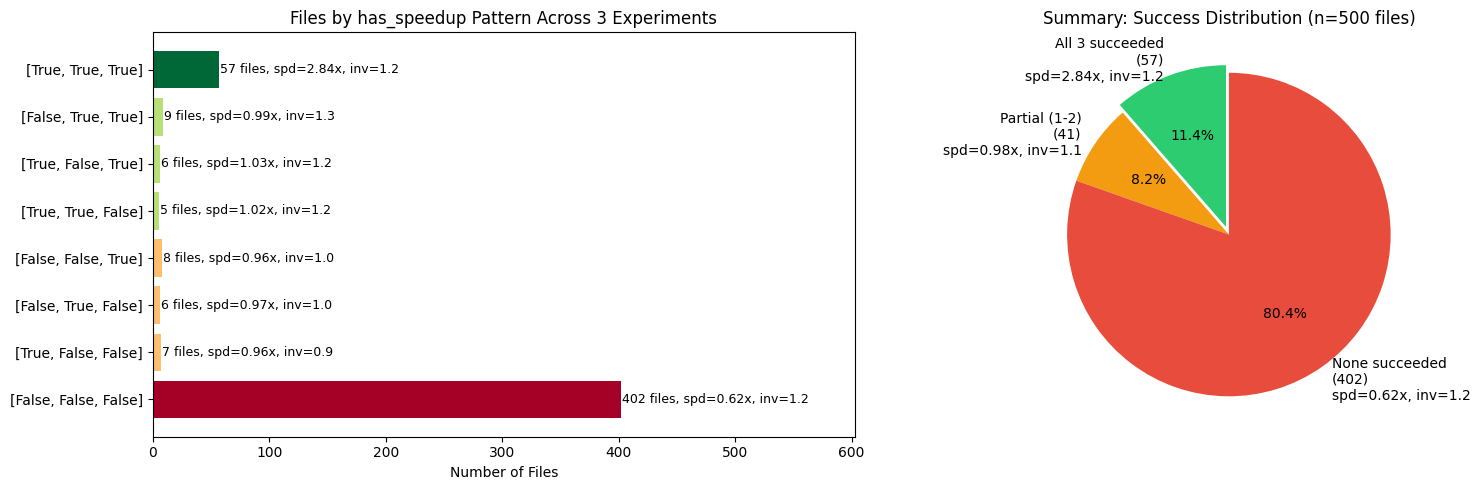


Summary:
  All 3 experiments succeeded: 57 files (11.4%) - avg speedup: 2.84x, avg invariants: 1.2
  Partial success (1-2 exp):   41 files (8.2%) - avg speedup: 0.98x, avg invariants: 1.1
  No success (0 exp):          402 files (80.4%) - avg speedup: 0.62x, avg invariants: 1.2


In [44]:
# Visualize has_speedup patterns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Include intersection pattern too, with speedup data
all_pattern_groups = defaultdict(list)
for s in speedup_stats:
    pattern = tuple(s["has_speedup"])
    all_pattern_groups[pattern].append(s)  # Store full stats, not just file name

# Sort patterns by number of True values (descending)
sorted_patterns = sorted(all_pattern_groups.keys(), key=lambda p: (-sum(p), p))
pattern_labels = [str(list(p)) for p in sorted_patterns]
pattern_counts = [len(all_pattern_groups[p]) for p in sorted_patterns]
pattern_success = [sum(p) for p in sorted_patterns]

# Calculate average speedup and average invariants for each pattern
pattern_avg_speedups = []
pattern_avg_invariants = []
for p in sorted_patterns:
    files_in_pattern = all_pattern_groups[p]
    avg_speedup = np.mean([s["avg"] for s in files_in_pattern])
    avg_inv = np.mean([s["avg_num_invariants"] for s in files_in_pattern])
    pattern_avg_speedups.append(avg_speedup)
    pattern_avg_invariants.append(avg_inv)

# Color map: green for all True, red for all False, gradient in between
colors = []
for p in sorted_patterns:
    ratio = sum(p) / len(p)
    colors.append(plt.cm.RdYlGn(ratio))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar chart
ax1 = axes[0]
bars = ax1.barh(range(len(sorted_patterns)), pattern_counts, color=colors)
ax1.set_yticks(range(len(sorted_patterns)))
ax1.set_yticklabels(pattern_labels)
ax1.set_xlabel("Number of Files")
ax1.set_title("Files by has_speedup Pattern Across 3 Experiments")
ax1.invert_yaxis()

# Add count labels on bars with average speedup and invariants
for i, (count, pattern, avg_spd, avg_inv) in enumerate(zip(pattern_counts, sorted_patterns, pattern_avg_speedups, pattern_avg_invariants)):
    success_rate = sum(pattern) / len(pattern) * 100
    ax1.text(count + 1, i, f"{count} files, spd={avg_spd:.2f}x, inv={avg_inv:.1f}", va='center', fontsize=9)

ax1.set_xlim(0, max(pattern_counts) * 1.5)

# Pie chart for summary with average speedups
ax2 = axes[1]
# Group into: All Success, Partial Success, No Success
all_success_files = [s for s in speedup_stats if all(s["has_speedup"])]
partial_success_files = [s for s in speedup_stats if any(s["has_speedup"]) and not all(s["has_speedup"])]
no_success_files = [s for s in speedup_stats if not any(s["has_speedup"])]

all_success = len(all_success_files)
partial_success = len(partial_success_files)
no_success = len(no_success_files)

# Calculate average speedups and average number of invariants per category
avg_spd_all = np.mean([s["avg"] for s in all_success_files]) if all_success_files else 0
avg_spd_partial = np.mean([s["avg"] for s in partial_success_files]) if partial_success_files else 0
avg_spd_none = np.mean([s["avg"] for s in no_success_files]) if no_success_files else 0

avg_inv_all = np.mean([s["avg_num_invariants"] for s in all_success_files]) if all_success_files else 0
avg_inv_partial = np.mean([s["avg_num_invariants"] for s in partial_success_files]) if partial_success_files else 0
avg_inv_none = np.mean([s["avg_num_invariants"] for s in no_success_files]) if no_success_files else 0

pie_data = [all_success, partial_success, no_success]
pie_labels = [
    f'All 3 succeeded\n({all_success})\nspd={avg_spd_all:.2f}x, inv={avg_inv_all:.1f}', 
    f'Partial (1-2)\n({partial_success})\nspd={avg_spd_partial:.2f}x, inv={avg_inv_partial:.1f}', 
    f'None succeeded\n({no_success})\nspd={avg_spd_none:.2f}x, inv={avg_inv_none:.1f}'
]
pie_colors = ['#2ecc71', '#f39c12', '#e74c3c']

wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%', 
                                    startangle=90, explode=(0.05, 0, 0))
ax2.set_title(f"Summary: Success Distribution (n={len(speedup_stats)} files)")

plt.tight_layout()
plt.show()

# Print summary with average speedups and invariants
print(f"\nSummary:")
print(f"  All 3 experiments succeeded: {all_success} files ({all_success/len(speedup_stats)*100:.1f}%) - avg speedup: {avg_spd_all:.2f}x, avg invariants: {avg_inv_all:.1f}")
print(f"  Partial success (1-2 exp):   {partial_success} files ({partial_success/len(speedup_stats)*100:.1f}%) - avg speedup: {avg_spd_partial:.2f}x, avg invariants: {avg_inv_partial:.1f}")
print(f"  No success (0 exp):          {no_success} files ({no_success/len(speedup_stats)*100:.1f}%) - avg speedup: {avg_spd_none:.2f}x, avg invariants: {avg_inv_none:.1f}")


=== Number of Invariants Statistics (Experiment: uautomizer25_eval_self_gen_invs_600.0_500_20251126_124156) ===
  Total files: 500
  Min:         0 (38 files)
  Max:         12 (1 files)
  Mean:        1.17
  Median:      1.0
  Std:         0.90
  25th pctl:   1.0
  75th pctl:   1.0

  Files with max (12) invariants:
    - 3994_7.c

  Distribution:
     0 invariants:  38 files (  7.6%) ███
     1 invariants: 382 files ( 76.4%) ██████████████████████████████████████
     2 invariants:  65 files ( 13.0%) ██████
     3 invariants:   9 files (  1.8%) 
     4 invariants:   1 files (  0.2%) 
     6 invariants:   2 files (  0.4%) 
     8 invariants:   2 files (  0.4%) 
    12 invariants:   1 files (  0.2%) 


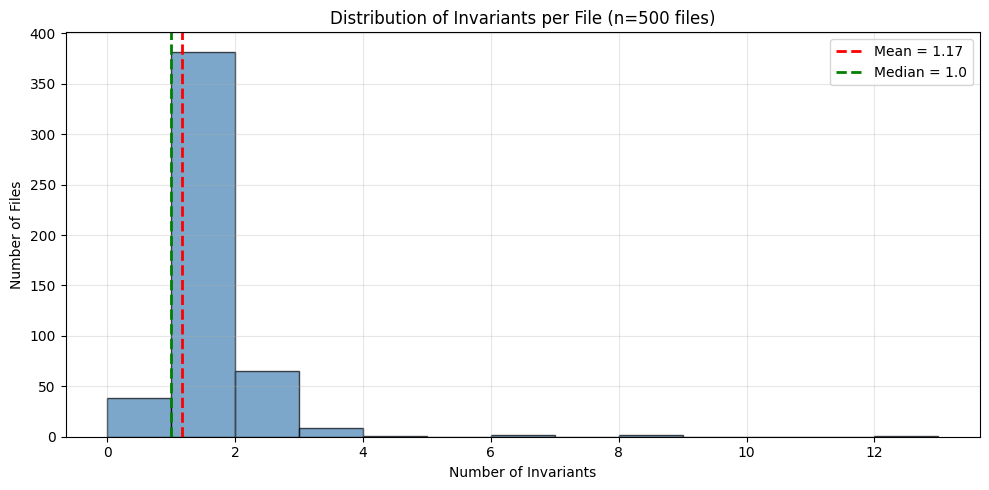

In [49]:
# Statistics for number of invariants across all files (from one experiment)
import json

# Load one experiment
exp_path = experiment_dirs[0]  # Use first experiment
with open(os.path.join(exp_path, "verification_results.json"), "r") as f:
    single_exp_data = json.load(f)

# Extract number of invariants for each file
num_invariants_per_file = []
for entry in single_exp_data["results"]:
    invariants = entry.get("invariants", [])
    num_invariants_per_file.append(len(invariants))

num_invariants_per_file = np.array(num_invariants_per_file)

# Print statistics
max_inv = np.max(num_invariants_per_file)
min_inv = np.min(num_invariants_per_file)

# Find files with max/min invariants
files_with_max = [entry["file"] for entry, n in zip(single_exp_data["results"], num_invariants_per_file) if n == max_inv]
files_with_min = [entry["file"] for entry, n in zip(single_exp_data["results"], num_invariants_per_file) if n == min_inv]

print(f"=== Number of Invariants Statistics (Experiment: {os.path.basename(exp_path)}) ===")
print(f"  Total files: {len(num_invariants_per_file)}")
print(f"  Min:         {min_inv} ({len(files_with_min)} files)")
print(f"  Max:         {max_inv} ({len(files_with_max)} files)")
print(f"  Mean:        {np.mean(num_invariants_per_file):.2f}")
print(f"  Median:      {np.median(num_invariants_per_file):.1f}")
print(f"  Std:         {np.std(num_invariants_per_file):.2f}")
print(f"  25th pctl:   {np.percentile(num_invariants_per_file, 25):.1f}")
print(f"  75th pctl:   {np.percentile(num_invariants_per_file, 75):.1f}")

# Show files with max invariants
print(f"\n  Files with max ({max_inv}) invariants:")
for f in files_with_max[:10]:  # Show up to 10
    print(f"    - {f}")
if len(files_with_max) > 10:
    print(f"    ... and {len(files_with_max) - 10} more")

# Distribution
unique, counts = np.unique(num_invariants_per_file, return_counts=True)
print(f"\n  Distribution:")
for val, cnt in zip(unique, counts):
    pct = cnt / len(num_invariants_per_file) * 100
    bar = '█' * int(pct / 2)
    print(f"    {val:2d} invariants: {cnt:3d} files ({pct:5.1f}%) {bar}")

# Histogram
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(num_invariants_per_file, bins=range(0, int(np.max(num_invariants_per_file)) + 2), 
        color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(np.mean(num_invariants_per_file), color='red', linestyle='--', linewidth=2, 
           label=f'Mean = {np.mean(num_invariants_per_file):.2f}')
ax.axvline(np.median(num_invariants_per_file), color='green', linestyle='--', linewidth=2, 
           label=f'Median = {np.median(num_invariants_per_file):.1f}')
ax.set_xlabel("Number of Invariants")
ax.set_ylabel("Number of Files")
ax.set_title(f"Distribution of Invariants per File (n={len(num_invariants_per_file)} files)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Find files with a specific number of invariants
target_num = 12

files_with_target = []
for entry in single_exp_data["results"]:
    invariants = entry.get("invariants", [])
    if len(invariants) == target_num:
        files_with_target.append({
            "file": entry["file"],
            "has_speedup": entry.get("has_speedup", False),
            "speedup": entry.get("speedup", None),
            "invariants": [inv["invariant"] for inv in invariants]
        })

print(f"Files with {target_num} invariants: {len(files_with_target)}")
for f in files_with_target:
    print(f"\n  {f['file']} (has_speedup={f['has_speedup']}, speedup={f['speedup']:.2f}x)")
    for i, inv in enumerate(f['invariants'], 1):
        print(f"    {i}. {inv[:80]}{'...' if len(inv) > 80 else ''}")





Files with 12 invariants: 1

  3994_7.c (has_speedup=False, speedup=0.72x)
    1. (((pCount == 0) && (2 <= n)) || ((2 <= n) && (1 <= pCount)))
    2. ((((i == 0) && (pCount == 0)) && (2 <= n)) || ((2 <= n) && (1 <= pCount)))
    3. ((2 <= n) && (1 <= pCount))
    4. ((((i <= n) && (2 <= n)) && (1 <= pCount)) || (((pCount == 0) && (i <= n)) && (2...
    5. (((pCount == 0) && (2 <= n)) || ((2 <= n) && (1 <= pCount)))
    6. ((((i == 0) && (pCount == 0)) && (2 <= n)) || ((2 <= n) && (1 <= pCount)))
    7. (1 < n)
    8. ((((i == 0) && (pCount == 0)) && (2 <= n)) || ((2 <= n) && (1 <= pCount)))
    9. (((pCount == 0) || (0 < pCount)) && (0 <= maxGap))
    10. (((pCount == 0) && (2 <= n)) || ((2 <= n) && (1 <= pCount)))
    11. (1 < n)
    12. ((i <= n) && (2 <= n))
No entry found for code_for_usfulness.c


In [52]:
# Average speedup for files with zero invariants across all experiments
files_with_zero_inv = [s for s in speedup_stats if s["avg_num_invariants"] == 0]

print(f"=== Files with Zero Invariants ===")
print(f"  Number of files: {len(files_with_zero_inv)}")

if files_with_zero_inv:
    avg_speedup_zero_inv = np.mean([s["avg"] for s in files_with_zero_inv])
    median_speedup_zero_inv = np.median([s["avg"] for s in files_with_zero_inv])
    
    # Count how many have has_speedup=True in all experiments
    all_speedup_count = sum(1 for s in files_with_zero_inv if all(s["has_speedup"]))
    
    print(f"  Average speedup:  {avg_speedup_zero_inv:.4f}x")
    print(f"  Median speedup:   {median_speedup_zero_inv:.4f}x")
    print(f"  Files with has_speedup=True in all experiments: {all_speedup_count}")
    
    print(f"\n  Sample files with zero invariants:")
    for s in files_with_zero_inv[:10]:
        print(f"    {s['file']}: avg speedup={s['avg']:.2f}x, has_speedup={s['has_speedup']}")
else:
    print("  No files with zero invariants found.")


=== Files with Zero Invariants ===
  Number of files: 38
  Average speedup:  0.7238x
  Median speedup:   0.7445x
  Files with has_speedup=True in all experiments: 2

  Sample files with zero invariants:
    1511_1.c: avg speedup=0.87x, has_speedup=[False, False, False]
    1668_1.c: avg speedup=0.78x, has_speedup=[False, False, False]
    1831_1.c: avg speedup=0.77x, has_speedup=[False, False, False]
    2192_1.c: avg speedup=0.86x, has_speedup=[False, False, False]
    226_1.c: avg speedup=0.96x, has_speedup=[False, False, False]
    2459_1.c: avg speedup=1.39x, has_speedup=[True, True, True]
    2506_1.c: avg speedup=0.73x, has_speedup=[False, False, False]
    2508_2.c: avg speedup=0.44x, has_speedup=[False, False, False]
    2699_1.c: avg speedup=0.75x, has_speedup=[False, False, False]
    3452_1.c: avg speedup=0.50x, has_speedup=[False, False, False]


In [53]:
# Investigate: Why do files with 0 invariants have speedup != 1.0?
# Let's look at actual entries from the JSON

print("=== Investigating files with 0 invariants ===\n")

# Find files with 0 invariants in the raw data
for entry in single_exp_data["results"][:]:
    invariants = entry.get("invariants", [])
    if len(invariants) == 0:
        print(f"File: {entry['file']}")
        print(f"  baseline_timing: {entry.get('baseline_timing', 'N/A'):.2f}s")
        print(f"  time_taken with inv: {entry.get('usefulness_report', {}).get('time_taken', 'N/A')}")
        print(f"  speedup: {entry.get('speedup', 'N/A')}")
        print(f"  has_speedup: {entry.get('has_speedup', 'N/A')}")
        print(f"  decision: {entry.get('usefulness_report', {}).get('decision', 'N/A')}")
        print(f"  original_result: {entry.get('original_result', 'N/A')}")
        print(f"  invariants: {invariants}")
        print()
        break  # Just show first one

# Count files with 0 invariants
zero_inv_entries = [e for e in single_exp_data["results"] if len(e.get("invariants", [])) == 0]
print(f"\nTotal files with 0 invariants in this experiment: {len(zero_inv_entries)}")


=== Investigating files with 0 invariants ===

File: 5327_2.c
  baseline_timing: 7.33s
  time_taken with inv: 7.812719810986891
  speedup: 0.938682382368975
  has_speedup: False
  decision: TRUE
  original_result: TRUE
  invariants: []


Total files with 0 invariants in this experiment: 38


In [36]:

print(f"\n=== FILES NOT IN INTERSECTION: {len(not_in_intersection)} files ===")
for f in sorted(not_in_intersection):
    s = next(x for x in speedup_stats if x["file"] == f)
    # Show which experiments had has_speedup=True vs False
    print(f"  {f}: has_speedup={s['has_speedup']}, speedups={[f'{v:.2f}' for v in s['vals']]}")



=== FILES NOT IN INTERSECTION: 443 files ===
  1053_1.c: has_speedup=[False, False, False], speedups=['0.99', '0.90', '0.99']
  1084_3.c: has_speedup=[False, False, False], speedups=['0.57', '0.56', '0.45']
  1124_1.c: has_speedup=[False, False, False], speedups=['0.66', '0.61', '0.64']
  1146_1.c: has_speedup=[False, False, False], speedups=['0.57', '0.61', '0.59']
  1173_1.c: has_speedup=[False, False, False], speedups=['0.26', '0.34', '0.22']
  1179_1.c: has_speedup=[False, False, False], speedups=['0.45', '0.42', '0.37']
  1222_1.c: has_speedup=[False, False, False], speedups=['0.49', '0.43', '0.45']
  1227_2.c: has_speedup=[False, False, False], speedups=['0.94', '0.91', '0.92']
  123_1.c: has_speedup=[False, False, False], speedups=['0.54', '0.54', '0.41']
  1244_1.c: has_speedup=[False, False, False], speedups=['0.77', '0.69', '0.72']
  1252_1.c: has_speedup=[False, False, False], speedups=['0.49', '0.60', '0.49']
  1270_2.c: has_speedup=[False, False, False], speedups=['0.05',

In [37]:

# Group files not in intersection by their has_speedup pattern
print(f"\n=== FILES NOT IN INTERSECTION: {len(not_in_intersection)} files ===")
pattern_groups = defaultdict(list)
for f in not_in_intersection:
    s = next(x for x in speedup_stats if x["file"] == f)
    pattern = tuple(s["has_speedup"])  # e.g., (True, True, False)
    pattern_groups[pattern].append((f, s))

# Sort patterns by number of True values (descending) to show "almost made it" first
for pattern in sorted(pattern_groups.keys(), key=lambda p: (-sum(p), p)):
    files_in_pattern = pattern_groups[pattern]
    true_count = sum(pattern)
    print(f"\n--- Pattern {list(pattern)} ({true_count}/3 experiments succeeded): {len(files_in_pattern)} files ---")
    for f, s in sorted(files_in_pattern, key=lambda x: x[0]):
        print(f"  {f}: speedups={[f'{v:.2f}' for v in s['vals']]}")


=== FILES NOT IN INTERSECTION: 443 files ===

--- Pattern [False, True, True] (2/3 experiments succeeded): 9 files ---
  1721_3.c: speedups=['0.75', '1.03', '1.05']
  2662_7.c: speedups=['0.98', '1.03', '1.07']
  2938_2.c: speedups=['0.36', '1.02', '1.05']
  3047_2.c: speedups=['0.89', '1.11', '1.09']
  4026_1.c: speedups=['0.85', '1.05', '1.01']
  5464_2.c: speedups=['0.99', '1.01', '1.07']
  5786_15.c: speedups=['0.95', '1.03', '1.07']
  5975_2.c: speedups=['0.97', '1.10', '1.03']
  8993_1.c: speedups=['1.00', '1.02', '1.08']

--- Pattern [True, False, True] (2/3 experiments succeeded): 6 files ---
  2890_3.c: speedups=['1.18', '0.96', '1.14']
  5655_2.c: speedups=['1.07', '0.99', '1.07']
  7311_1.c: speedups=['1.08', '0.91', '1.08']
  799_3.c: speedups=['1.18', '0.95', '1.21']
  8428_1.c: speedups=['1.04', '0.96', '1.02']
  8982_1.c: speedups=['1.34', '0.14', '1.16']

--- Pattern [True, True, False] (2/3 experiments succeeded): 5 files ---
  1754_1.c: speedups=['1.03', '1.00', '0.9


Statistics for number of invariants (first experiment):
  Total files: 500
  Min: 0
  Max: 0
  Mean: 0.00
  Histogram:
    0: 500
